In [1]:
import requests
# res=requests.get('http://naver.com')
res=requests.get('http://nadocoding.tistory.com')
print('응답코드:',res.status_code)# 200이면 정상 

if res.status_code== requests.codes.ok:
    print('정상입니다')
else:
    print('문제가 생겼습니다.[에러코드',res.status_code,']') 

응답코드: 200
정상입니다


## 정규 표현식  --> 정해진 형태의 식 

- 주민등록번호 
- 901201-1111111
- 이메일 주소 : seonm11@naver.com


In [2]:
import re 

In [3]:
p = re.compile('ca.e')
# . : 하나의 문자를 의미 --> care, cafe, case(0)  | caffe(x)
# ^ (^de) : 문자열의 시작 --> desl, destination (0) | fade (x)
# $(se$): 문자열의 끝
def print_match(m):
    if m:
        print('m.group():',m.group()) # 일치하는 문자열 반환
        print('m.string:',m.string)# 입력받은 문자열 , 변수임 
        print('m.start():',m.start())# 일치하는 문자열의 시작 index
        print('m.end():',m.end()) # 일치하는 문자열의 끝 index
        print('m.span():',m.span())# 일치하는 문자열의 시작/ 끝 index
    else:
        print('매칭되지 않음')

# m = p.match('careless') # match :주어진 문자열의 처음부터 일치하는지 확인 
# print_match(m)


m=p.search('careless') # search : 주어진 문자열 중에 일치하는게 있는지 확인 
print_match(m)


m.group(): care
m.string: careless
m.start(): 0
m.end(): 4
m.span(): (0, 4)


In [4]:
lst = p.findall('goof care cafe')# findall : 일치하는 모든 것을 리스트 형태로 반환 
print(lst)

['care', 'cafe']


##### 정규식을 쓸 때
1. p = re.compile('원하는 형태')
2. m = p.match('비교할 문자열'): 주어진 물자열의 처움부터 일치하는지 확인 
3. m = p.search('비교한 문자열'): 주어진 문자열 중에 일치하는게 있는지 확인 
4. lst = p.findall('비교할 문자열'):일치하는 모든 것을 '리스트 형태로 반환 

5. . : 하나의 문자를 의미 --> care, cafe, case(0)  | caffe(x)
6. ^ (^de) : 문자열의 시작 --> desl, destination (0) | fade (x)
7. $(se$): 문자열의 끝

w3shcool

In [5]:
import requests
# res=requests.get('http://naver.com')
res=requests.get('http://google,com')
#res.raise_for_status()
print(len(res.text))
print(res.text)

with open('mygoogle.html','w',encoding='utf8') as f:
    f.write(res.test)



ConnectionError: HTTPConnectionPool(host='google,com', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001748C560940>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [7]:
headers={"User-Agent":"Mozilla/5.0"} # requests로 접속하는 것이 사람이 아니라 이상한 컴퓨터라 인식해 제대로 된 정보를 안줄 때 User-Agent 사용

page=requests.get(url, headers=headers)
page


NameError: name 'url' is not defined

https://www.whatismybrowser.com/detect/what-is-my-user-agent
#### 내  에이전트 찾기 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore") #경고 표시 제거는 일시적으로만 하자... 중요한 내용일수도

import matplotlib.font_manager as fm #한글 안깨지게
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl # - 표시 정상적으로 되도록
mpl.rcParams["axes.unicode_minus"]=False

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

In [4]:
url = 'https://comic.naver.com/webtoon/weekday'
res= requests.get(url)
res.raise_for_status()
soup = BeautifulSoup(res.text,'lxml') # 가저온 html 문서를 lxml을 통해서  BeautifulSoup객체로 만듬 
# soup 에는 모든 정보를 가지고 있음. 
# print(soup.title)
# print(soup.title.get_text()) # 텍스트 만 
print(soup.a) # soup는 모든 html의 정보가 있는데 그중에서 첫번째로 발견되는 a태그정보를 뿌려줘
print('-----------------------')
print(soup.a.attrs) # a태그가 가지고 있는 속성정보를 출력 
print(soup.a['href']) # a태그의 속성 값을 가지고 오고 싶을 때 


<a href="#menu" onclick="document.getElementById('menu').tabIndex=-1;document.getElementById('menu').focus();return false;"><span>메인 메뉴로 바로가기</span></a>
-----------------------
{'href': '#menu', 'onclick': "document.getElementById('menu').tabIndex=-1;document.getElementById('menu').focus();return false;"}
#menu


### 페이지에 대해서 잘 모를때 

- find


In [5]:
# 클레스 값이 Nbtn_upload 인 a element를 찾아줘
print(soup.find('a',attrs={'class':'Nbtn_upload'}))

<a class="Nbtn_upload" href="/mypage/myActivity" onclick="nclk_v2(event,'olk.upload');">웹툰 올리기</a>


In [6]:
# a태그를 빼도됨 왜냐하면 이페이지에서 웹툰 올리기는 하나기 때문에 
# a class Nbtn_upload 인 a element를 찾아줘
print(soup.find(attrs={'class':'Nbtn_upload'}))

<a class="Nbtn_upload" href="/mypage/myActivity" onclick="nclk_v2(event,'olk.upload');">웹툰 올리기</a>


In [7]:
print(soup.find('li',attrs={'class':'rank01'}))

<li class="rank01">
<a href="/webtoon/detail?titleId=703846&amp;no=193" onclick="nclk_v2(event,'rnk*p.cont','703846','1')" title="여신강림-188화">여신강림-188화</a>
<span class="rankBox">
<img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/comic/images/migration/common/arrow_no.gif" title="변동없음" width="7"/> 0
						
					
				</span>
</li>


In [8]:
# rank1의 전체 정보들
rank1=soup.find('li',attrs={'class':'rank01'})

# rank1의 a 태그 속성들 
rank1.a
print(rank1.a['href'])

/webtoon/detail?titleId=703846&no=193


In [9]:
print(rank1.a.get_text())
rank1.next_siblings

여신강림-188화


<generator object PageElement.next_siblings at 0x000001A4DEA466D0>

In [10]:
# 다음 랭크- 형제 이동 
rank2=rank1.next_sibling.next_sibling
rank2

<li class="rank02">
<a href="/webtoon/detail?titleId=783053&amp;no=9" onclick="nclk_v2(event,'rnk*p.cont','783053','2')" title="김부장-9화 우리 집안이 어떤 집안인데">김부장-9화 우리 집안이 어떤 집안인데</a>
<span class="rankBox">
<img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/comic/images/migration/common/arrow_no.gif" title="변동없음" width="7"/> 0
						
					
				</span>
</li>

In [11]:
rank3=rank2.next_sibling.next_sibling
print(rank3.a.get_text())

한림체육관-83화


In [12]:
rank2 = rank3.previous_sibling.previous_sibling
rank2.a.get_text()

'김부장-9화 우리 집안이 어떤 집안인데'

In [13]:
# rank1을 기준으로 부모로 이동 
rank1.parent

<ol class="asideBoxRank" id="realTimeRankFavorite">
<li class="rank01">
<a href="/webtoon/detail?titleId=703846&amp;no=193" onclick="nclk_v2(event,'rnk*p.cont','703846','1')" title="여신강림-188화">여신강림-188화</a>
<span class="rankBox">
<img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/comic/images/migration/common/arrow_no.gif" title="변동없음" width="7"/> 0
						
					
				</span>
</li>
<li class="rank02">
<a href="/webtoon/detail?titleId=783053&amp;no=9" onclick="nclk_v2(event,'rnk*p.cont','783053','2')" title="김부장-9화 우리 집안이 어떤 집안인데">김부장-9화 우리 집안이 어떤 집안인데</a>
<span class="rankBox">
<img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/comic/images/migration/common/arrow_no.gif" title="변동없음" width="7"/> 0
						
					
				</span>
</li>
<li class="rank03">
<a href="/webtoon/detail?titleId=743139&amp;no=83" onclick="nclk_v2(event,'rnk*p.cont','743139','3')" title="한림체육관-83화">한림체육관-83화</a>
<span class="rankBox">
<img alt="변동없음" height="10" src="https://ssl.pstatic.net/stat

In [14]:
# next_sibling 두번 쓰기 싫을 때
# next_sibling로가는데 조건에 해당하는 것만 다음 항목 
rank2=rank1.find_next_sibling('li')
print(rank2.a.get_text())
rank3=rank2.find_next_sibling('li')
print(rank3.a.get_text())

rank2=rank3.find_previous_sibling('li')
print(rank2.a.get_text())

김부장-9화 우리 집안이 어떤 집안인데
한림체육관-83화
김부장-9화 우리 집안이 어떤 집안인데


In [15]:
# 형제들 모두 가져오기 
rank=rank1.find_next_siblings('li')


In [21]:
# 해당하는 텍스트의 정보를 가져와라 
webtoon = soup.find('a',text='퀘스트지상주의-10화 플레티넘 카드!')
print(webtoon)

<a href="/webtoon/detail?titleId=783052&amp;no=10" onclick="nclk_v2(event,'rnk*p.cont','783052','2')" title="퀘스트지상주의-10화 플레티넘 카드!">퀘스트지상주의-10화 플레티넘 카드!</a>


In [22]:
<a onclick="nclk_v2(event,'rnk*p.cont','783052','2')" href="/webtoon/detail?titleId=783052&amp;no=10" title="퀘스트지상주의-10화 플레티넘 카드!">퀘스트지상주의-10화 플레티넘 카드!</a>

SyntaxError: invalid syntax (<ipython-input-22-6eac7dcba47b>, line 1)

In [23]:
url = 'https://comic.naver.com/webtoon/weekday'
res= requests.get(url)
res.raise_for_status()
soup = BeautifulSoup(res.text,'lxml')
cartoons= soup.find_all('a',attrs={'class':'title'})
# class 속성이 title 인 모든 'a' element 를 반환 
for cartoon in cartoons:
    print(cartoon.get_text())

쇼미더럭키짱!
참교육
신의 탑
소녀의 세계
퀘스트지상주의
백수세끼
장씨세가 호위무사
팔이피플
앵무살수
잔불의 기사
만렙돌파
리턴 투 플레이어
요리GO
더블클릭
2022 서브병에 빠지다!
히어로메이커
칼가는 소녀
똑 닮은 딸
결혼생활 그림일기
오늘의 순정망화
물어보는 사이
황제와의 하룻밤
평범한 8반
신군
슈퍼캐스팅: BTS
제왕: 빛과 그림자
원작은 완결난 지 한참 됐습니다만
꼬리잡기
이별 후 사내 결혼
아는 여자애
꿈의 기업
남주서치
말박왕
아, 쫌 참으세요 영주님!
순정말고 순종
장난감
오빠집이 비어서
달로 만든 아이
이제야 연애
레지나레나 - 용서받지 못한 그대에게
하루의 하루
와이키키 뱀파이어
슈퍼스타 천대리
바퀴
야생천사 보호구역
또다시, 계약 부부
최후의 금빛아이
홍천기
이중첩자
착한건 돈이된다
원하는 건 너 하나
라서드
왕따협상
수영만화일기
모스크바의 여명
백호랑
드로잉 레시피
역주행!
중독연구소
바로 보지 않는
개밥 먹는 남자
그림자 신부
사막에 핀 달
마지막 지수
모락모락 왕세자님
이탄국의 자청비
트리거
오로지 오로라
보살님이 캐리해!
기사님을 지켜줘
헬로맨스
악녀 18세 공략기
쇼미더럭키짱!
여신강림
김부장
1을 줄게
내가 키운 S급들
한림체육관
사신소년
중증외상센터 : 골든 아워
하루만 네가 되고 싶어
용사가 돌아왔다
엽총소년
달콤살벌한 부부
랜덤채팅의 그녀!
니나의 마법서랍
신도림
삼국지톡
헬58
소극적 인간
하북팽가 막내아들
호랑이 들어와요
덴큐
100
원주민 공포만화
택배 왔습니다
윌유메리미
애옹식당
몬스터
2022 서브병에 빠지다!
위아더좀비
오늘의 순정망화
하우스키퍼
견우와 선녀
대공님, 실수였어요!
슈퍼캐스팅: BTS
빌런투킬
용왕님의 셰프가 되었습니다
시벨롬 리스트
3cm 헌터
은주의 방 2~3부
정년이
빅맨
아이즈
아이레
이상형은 아닙니다
나타나주세요!
제로게임
성인초딩
이븐 모어
나의 최애를 지켜줘
그 남주와 이별하는 방법
오파츠
나의 플랏메이트
안식의 밤
필리아로제 - 가시왕관의 예언
열녀박씨 계약결혼뎐
나는 어디에나 있다

In [24]:
# find --> 그조 건에 해당하는 첫번째 엘리먼트
# find_all--> 그 조건에 해당하는 모든 엘리먼드

In [25]:
# 뷰티풀 군바리 + 링크와 제목 스크래핑 
url='https://comic.naver.com/webtoon/list?titleId=648419'
res= requests.get(url)
res.raise_for_status()
soup = BeautifulSoup(res.text,'lxml')
cartoons = soup.find_all('td',attrs={'class':'title'})
title=cartoons[1].a.get_text()
link = cartoons[1].a['href']
print(title)
print('https://comic.naver.com'+link)


314화_2008년 스타트 (3부 마지막 화)
https://comic.naver.com/webtoon/detail?titleId=648419&no=319&weekday=mon


In [26]:
for cartoon in cartoons:
    title=cartoon.a.get_text()
    link = 'https://comic.naver.com'+cartoon.a['href']
    print(title,link)
    

315화_3부 못 다한 이야기(외전) https://comic.naver.com/webtoon/detail?titleId=648419&no=320&weekday=mon
314화_2008년 스타트 (3부 마지막 화) https://comic.naver.com/webtoon/detail?titleId=648419&no=319&weekday=mon
313화_연말 마무리 https://comic.naver.com/webtoon/detail?titleId=648419&no=318&weekday=mon
312화_메리 크리스마스 https://comic.naver.com/webtoon/detail?titleId=648419&no=317&weekday=mon
311화_정민의 노래 https://comic.naver.com/webtoon/detail?titleId=648419&no=316&weekday=mon
310화_52기 전역 (2) https://comic.naver.com/webtoon/detail?titleId=648419&no=315&weekday=mon
309화_52기 전역 https://comic.naver.com/webtoon/detail?titleId=648419&no=314&weekday=mon
308화_정인정민 https://comic.naver.com/webtoon/detail?titleId=648419&no=313&weekday=mon
307화_국희와 정민 https://comic.naver.com/webtoon/detail?titleId=648419&no=312&weekday=mon
306화_깽판 https://comic.naver.com/webtoon/detail?titleId=648419&no=311&weekday=mon


In [27]:
# 뷰티풀 군바리 + 링크와 제목 스크래핑 + 평점(평균평점 계산)
total_rates=0
ratings = soup.find_all('div',attrs={'class':'rating_type'})
for rating in ratings:
    rate=rating.find('strong').get_text()
    print(rate)
    total_rates += float(rate)
print('전체 점수: ', total_rates)
print('평균 점수: ', total_rates/len(ratings))

9.39
9.60
9.82
9.51
9.81
9.69
9.60
9.00
8.80
6.47
전체 점수:  91.69
평균 점수:  9.169


### 3. 쿠팡 웹스크레핑 

- http method
    - Get --> url로 누구나 볼 수 있게 보내는 방식
        - e.g. https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page=5
        - ? 뒤에 있는 것으로 부터 변수와 값들을 제시 &: 변수 변수 연결 
        - url이 계속 변경하는 -> 페이지 변경했을 때
    - POST --> http message body 에 숨겨서 보내는 방식
        - 페이지 변경시 url 변경되지 않음.

In [2]:
import requests
import re
from bs4 import BeautifulSoup
url='https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page=1&rocketAll=false&searchIndexingToken=1=5&backgroundColor='
headers= {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'}

res = requests.get(url,headers=headers)
res.raise_for_status()
soup = BeautifulSoup(res.text,'lxml')

# 잘불러왔는지 확인 
# print(res.text)

#search-product 로 시작하는 모든거 가져오기
items= soup.find_all('li',attrs={'class':re.compile('^search-product')})
#print(items[0].find('div',attrs={'class':'name'}).get_text())

for item in items:
    #광고 제품은 제외 
    ad_badge = item.find('span',attrs={'class':'ad-badge ad-position-D'})
    if ad_badge:
        print(' < 광고 상품 제외합니다.>')
        continue
    name = item.find('div',attrs={'class':'name'}).get_text()# 제품명
    price = item.find('strong',attrs={'class':'price-value'}).get_text()#가격
    
    
    rate=item.find('div',attrs={'class':'rating-star'}) #평점
    if rate:
        rate = rate.get_text()
    else:
        rate = '평점없음'

    rate_count=item.find('span',attrs={'class':'rating-total-count'})#폄점수
    if rate_count:
        rate_count = rate_count.get_text()
    else:
        rate_count = '평점없음'
    
    print(name,price,rate,rate_count)
    


 < 광고 상품 제외합니다.>
삼성전자 2021 노트북 플러스2 15.6, 퓨어 화이트, 셀러론, NVMe128GB, 8GB, WIN10 Pro, NT550XDA-K14AW 1,105,000 5.0 (2379) (2379)
LG전자 2020 울트라 PC 15.6, 화이트, 라이젠3 3세대, 256GB, 8GB, Free DOS, 15UD40N-GX36K 589,840 5.0 (1215) (1215)
삼성전자 2020 노트북 15.6, 퓨어 화이트, 코어i5 10세대, 256GB, 16GB, WIN10 Home, NT350XCR-AD5WA 899,000 5.0 (2616) (2616)
 < 광고 상품 제외합니다.>
 < 광고 상품 제외합니다.>
에이수스 2021 X415 14, 투명 실버, 코어i5 10세대, 256GB, 8GB, Free DOS, X415JA-CP121 509,000 5.0 (112) (112)
삼성전자 2020 갤럭시북 S 13.3, 머큐리 그레이, 코어i5, 256GB, 8GB, WIN10 Home, NT767XCL-KC58S 839,000 5.0 (677) (677)
 < 광고 상품 제외합니다.>
델 2021 G15, 펜텀 그레이 위드 스펙클, 라이젠7 4세대, 512GB, 16GB, WIN10 Home, DG5515-WH01DKR 1,699,000 5.0 (75) (75)
레노버 2020 V14, 그레이, 라이젠5 3세대, 256GB, 8GB, Free DOS, 82DQ003AKR 469,000 4.5 (363) (363)
레노버 2021 IdeaPad Slim3 14, 플레티넘 그레이, A4, 128GB, 4GB, WIN10 Home, 14ADA 698,000 4.5 (132) (132)
HP 2021 노트북 15s, 스노우 화이트, 라이젠5 3세대, 256GB, 4GB, Free DOS, 15s-EQ1151AU 479,050 5.0 (161) (161)
HP 2021 노트북 14s, 실버, 라이젠3 4세대, 256GB, 8GB, WI

In [3]:
import requests
import re
from bs4 import BeautifulSoup
url='https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page=1&rocketAll=false&searchIndexingToken=1=5&backgroundColor='
headers= {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'}

res = requests.get(url,headers=headers)
res.raise_for_status()
soup = BeautifulSoup(res.text,'lxml')

# 잘불러왔는지 확인 
# print(res.text)

#search-product 로 시작하는 모든거 가져오기
items= soup.find_all('li',attrs={'class':re.compile('^search-product')})
#print(items[0].find('div',attrs={'class':'name'}).get_text())

for item in items:
    #광고 제품은 제외 
    ad_badge = item.find('span',attrs={'class':'ad-badge ad-position-D'})
    if ad_badge:
        print(' < 광고 상품 제외합니다.>')
        continue
    name = item.find('div',attrs={'class':'name'}).get_text()# 제품명
    if 'Apple' in name:
        print('<애플 상품 제외')
        continue
    price = item.find('strong',attrs={'class':'price-value'}).get_text()#가격
    
    # 리뷰 100개 이상, 평점 4.5 이상 되는 것만 조회
    rate=item.find('div',attrs={'class':'rating-star'}) #평점
    if rate:
        rate = rate.get_text()
    else:
        print('<평점 없는 상품은 제외합니다')
        continue

    rate_count=item.find('span',attrs={'class':'rating-total-count'})#폄점수
    if rate_count:
        rate_count = rate_count.get_text()
        rate_count = rate_count[1:-1]
#         print('리뷰수',rate_count)
    else:
        print('<평점 수 없는 상품은 제외합니다.')
        continue
    
    
        print(name,price,rate,rate_count)

 < 광고 상품 제외합니다.>
 < 광고 상품 제외합니다.>
 < 광고 상품 제외합니다.>
 < 광고 상품 제외합니다.>
 < 광고 상품 제외합니다.>
 < 광고 상품 제외합니다.>


In [9]:
# 페이지를 늘려가며 웹스크래핑하기 

import requests
import re
from bs4 import BeautifulSoup
headers= {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'}

for i in range(1,6):
    print('페이지 :',i)
    url='https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={}&rocketAll=false&searchIndexingToken=1=5&backgroundColor='.format(i)

    res = requests.get(url,headers=headers)
    res.raise_for_status()
    soup = BeautifulSoup(res.text,'lxml')

    # 잘불러왔는지 확인 
    # print(res.text)

    #search-product 로 시작하는 모든거 가져오기
    items= soup.find_all('li',attrs={'class':re.compile('^search-product')})
    #print(items[0].find('div',attrs={'class':'name'}).get_text())

    for item in items:
        #광고 제품은 제외 
        ad_badge = item.find('span',attrs={'class':'ad-badge ad-position-D'})
        if ad_badge:
            print(' < 광고 상품 제외합니다.>')
            continue
        name = item.find('div',attrs={'class':'name'}).get_text()# 제품명
        if 'Apple' in name:
            print('<애플 상품 제외')
            continue
        price = item.find('strong',attrs={'class':'price-value'}).get_text()#가격

        # 리뷰 100개 이상, 평점 4.5 이상 되는 것만 조회
        rate=item.find('div',attrs={'class':'rating-star'}) #평점
        if rate:
            rate = rate.get_text()
        else:
            print('<평점 없는 상품은 제외합니다')
            continue

        rate_count=item.find('span',attrs={'class':'rating-total-count'})#폄점수
        if rate_count:
            rate_count = rate_count.get_text()
            rate_count = rate_count[1:-1]
    #         print('리뷰수',rate_count)
        else:
            print('<평점 수 없는 상품은 제외합니다.')
            continue

        link = item.find('a',attrs={'class':'search-product-link'})['href']
        
        
        print(f'제품명 : {name}')
        print(f'가격 : {price}')
        print(f'평점 : {rate}점 ({rate_count})')
        print('바로가기: {}'.format('https://www.coupang.com'+link))
            

페이지 : 1
제품명 : LG전자 2020 울트라 PC 15.6, 화이트, 라이젠3 3세대, 256GB, 8GB, Free DOS, 15UD40N-GX36K
가격 : 589,840
평점 : 5.0 (1215)점 (1215)
바로가기: https://www.coupang.com/vp/products/4919104915?itemId=3545239388&vendorItemId=71531197627
제품명 : 삼성전자 2020 노트북 15.6, 퓨어 화이트, 코어i5 10세대, 256GB, 16GB, WIN10 Home, NT350XCR-AD5WA
가격 : 899,000
평점 : 5.0 (2616)점 (2616)
바로가기: https://www.coupang.com/vp/products/4698318558?itemId=6272853340&vendorItemId=73568469306&pickType=COU_PICK
제품명 : 에이수스 2021 X415 14, 투명 실버, 코어i5 10세대, 256GB, 8GB, Free DOS, X415JA-CP121
가격 : 509,000
평점 : 5.0 (112)점 (112)
바로가기: https://www.coupang.com/vp/products/4923290135?itemId=6454661556&vendorItemId=73749117543
제품명 : 삼성전자 2021 노트북 플러스2 15.6, 퓨어 화이트, 셀러론, NVMe128GB, 8GB, WIN10 Pro, NT550XDA-K14AW
가격 : 1,105,000
평점 : 5.0 (2379)점 (2379)
바로가기: https://www.coupang.com/vp/products/5358757879?itemId=7416308410&vendorItemId=79941957959
 < 광고 상품 제외합니다.>
 < 광고 상품 제외합니다.>
제품명 : LG전자 2021 울트라 PC 노트북 14, 화이트, 14U30P-E316K, 셀러론, 64GB, 4GB, WIN10 Pro
가격 

제품명 : 델 2021 Inspiron 15, 플래티넘 실버, 코어i5 11세대, 256GB, 8GB, Free DOS, DN5510-UB03KR
가격 : 1,000,000
평점 : 5.0 (25)점 (25)
바로가기: https://www.coupang.com/vp/products/5607304890?itemId=9050864175&vendorItemId=79770398933
제품명 : LG전자 2020 울트라 PC 15.6, 화이트, 코어i5 10세대, 256GB, 8GB, WIN10 Home, 15U50N-GR56K
가격 : 1,496,050
평점 : 5.0 (209)점 (209)
바로가기: https://www.coupang.com/vp/products/1605328033?itemId=2741779850&vendorItemId=79947559102
제품명 : 레노버 2020 IdeaPad Slim3 15.6, 플레티넘 그레이, 펜티엄, 128GB, 4GB, WIN10 Home, 81WB00JJKR
가격 : 378,970
평점 : 5.0 (29)점 (29)
바로가기: https://www.coupang.com/vp/products/2354336911?itemId=4084468022&vendorItemId=72068470817
제품명 : 레노버 2021 IdeaPad Slim3 15.6, 샌드, 코어i5 11세대, 1024GB, 8GB, Free DOS, 82H800H9KR
가격 : 669,000
평점 : 4.5 (453)점 (453)
바로가기: https://www.coupang.com/vp/products/5652741363?itemId=9255539736&vendorItemId=76541131942
제품명 : 삼성전자 2020 플러스 15.6, 퓨어 화이트, 코어i3 10세대, 256GB, 16GB, WIN10 Home, NT350XCR-AD3AW
가격 : 1,315,870
평점 : 5.0 (2616)점 (2616)
바로가기: https://www.c

제품명 : HP 2021 노트북 15s, 스노우 화이트, 코어i3 11세대, 256GB, 4GB, WIN10 Home, 15s-fq2012TU
가격 : 544,910
평점 : 5.0 (93)점 (93)
바로가기: https://www.coupang.com/vp/products/5422922998?itemId=8197943786&vendorItemId=75486044103
제품명 : HP 2020 노트북 14s, 퓨어 화이트, 펜티엄, 128GB, 4GB, WIN10 Home, 14s-cf2055tu
가격 : 437,000
평점 : 4.5 (62)점 (62)
바로가기: https://www.coupang.com/vp/products/5689565461?itemId=8918516970&vendorItemId=76205115656
제품명 : 레노버 2021 V15 GEN2, 셀러론, 128GB, 4GB, Free DOS, 82C3001FKR
가격 : 432,920
평점 : 5.0 (34)점 (34)
바로가기: https://www.coupang.com/vp/products/2269463995?itemId=3891709083&vendorItemId=79687071130
제품명 : 에이서 2021 Aspire5 15.6, 실버, 라이젠5 5세대, 256GB, 8GB, Free DOS, A515-45-R9K8
가격 : 579,000
평점 : 5.0 (32)점 (32)
바로가기: https://www.coupang.com/vp/products/5575598855?itemId=8894940385&vendorItemId=76181579007
제품명 : 이태원클라쓰북 그램스타일 노트북 풀패키지미개봉 NB141LTN41 8세대 14 IPS FHD 윈10탑재, 화이트, NB141LTN41 [32G+SD64G]
가격 : 299,000
평점 : 4.5 (452)점 (452)
바로가기: https://www.coupang.com/vp/products/322895378?itemId=103

In [20]:
import requests
from bs4 import BeautifulSoup
res=requests.get('https://search.daum.net/search?w=tot&q=2020%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84&DA=MOR&rtmaxcoll=MOR')
res.raise_for_status()
soup= BeautifulSoup(res.text,'lxml')
images= soup.find_all('img',attrs={'class':'thumb_img'})

for idx,image in enumerate(images):
    image_url=image["src"]
    if image_url.startswith('//'):# //로 시작한다면
        image_url = 'http'+image_url
        
    print(image_url)    
    image_res = requests.get(image_url)
    image_res.raise_for_status()
    
    # 파일 저장 
    with open('movie{}.jpg'.format(idx+1),'wb') as f:
        f.write(image_res.content)
        
        # 페이지 모두 긁어옴 

https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F2b07e0c665de4482b9a0094f66bc11761578025532290
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fc15a793c35cd41c32c27188faba84211a9185fa0
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F389d6e403d8ee48c419c7b16908919103e2c2670
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F23837d99576d43ba8e594f91497fea981579656331276
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F45ee167dd5a1fbbadc03af21dcba065324132c27
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fc8555d7906ba4559a1290c616e416c4c1576742973513
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F0695528a5d4f1daa2523e174d4566bbb50a880c2
https://search1.kakaocdn.net/thumb/R232x328

In [21]:
import requests
from bs4 import BeautifulSoup
res=requests.get('https://search.daum.net/search?w=tot&q=2020%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84&DA=MOR&rtmaxcoll=MOR')
res.raise_for_status()
soup= BeautifulSoup(res.text,'lxml')
images= soup.find_all('img',attrs={'class':'thumb_img'})

for idx,image in enumerate(images):
    image_url=image["src"]
    if image_url.startswith('//'):# //로 시작한다면
        image_url = 'http'+image_url
        
    print(image_url)    
    image_res = requests.get(image_url)
    image_res.raise_for_status()
    
    # 파일 저장 
    with open('movie{}.jpg'.format(idx+1),'wb') as f:
        f.write(image_res.content)
        
    if idx >=4 : # 상위 5개 이미지까지만 다운로드
        break

https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F2b07e0c665de4482b9a0094f66bc11761578025532290
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fc15a793c35cd41c32c27188faba84211a9185fa0
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F389d6e403d8ee48c419c7b16908919103e2c2670
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F23837d99576d43ba8e594f91497fea981579656331276
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F45ee167dd5a1fbbadc03af21dcba065324132c27


In [23]:
import requests
from bs4 import BeautifulSoup


for year in range(2016,2021):
    url='https://search.daum.net/search?w=tot&q={}%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84&DA=MOR&rtmaxcoll=MOR'.format(year)
    res=requests.get(url)
    res.raise_for_status()
    soup= BeautifulSoup(res.text,'lxml')
    images= soup.find_all('img',attrs={'class':'thumb_img'})
    
    for idx,image in enumerate(images):
        image_url=image["src"]
        if image_url.startswith('//'):# //로 시작한다면
            image_url = 'http'+image_url

        print(image_url)    
        image_res = requests.get(image_url)
        image_res.raise_for_status()

        # 파일 저장 
        with open('movie_{}_{}.jpg'.format(year,idx+1),'wb') as f:
            f.write(image_res.content)

        if idx >=4 : # 상위 5개 이미지까지만 다운로드
            break

https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F38259ef0ed3416ddcc98cd0c30b6f1ad5e5f5f1d
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fc68515cc88d0227584f67deaa3d0046204ae998b
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fa89c0d7605a29583310a1ba4716bf2d1ccf69bbd
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F9ee4bab1a0f51fb4469b6162bad861f6d25056a7
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F326c4b4cc894250c0bf9356c65110a9f5dc967ca
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fc98cf3e74671b88df0f2b31b516c0aaea2e1a816
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fae457b72c9a9ec2c8d2f44a893098ec060f0e598
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%

In [44]:
# 웹스크래핑으로 가져온 것을 csv로 저장하기 

import csv
import requests
from bs4 import BeautifulSoup
url='https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

for page in range(1,2):
       
    res=requests.get(url+str(page))
    res.raise_for_status()
    soup=BeautifulSoup(res.text,'lxml')
    
    data_rows=soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
    for row in data_rows:
        columns=row.find_all('td')
        data=[column.get_text() for column in columns]
        print(data) #이렇게 만 하면 빈줄, 값들이 이상함.

['']
['1', '삼성전자', '78,800', '\n\n\t\t\t\t1,500\n\t\t\t\t\n', '\n\n\t\t\t\t-1.87%\n\t\t\t\t\n', '100', '4,704,189', '5,969,783', '51.89', '19,681,132', '15.27', '9.99', '']
['2', 'SK하이닉스', '127,000', '\n\n\t\t\t\t500\n\t\t\t\t\n', '\n\n\t\t\t\t-0.39%\n\t\t\t\t\n', '5,000', '924,563', '728,002', '48.95', '3,825,725', '11.48', '9.53', '']
['3', 'NAVER', '382,000', '\n\n\t\t\t\t2,500\n\t\t\t\t\n', '\n\n\t\t\t\t-0.65%\n\t\t\t\t\n', '100', '626,668', '164,049', '56.15', '351,967', '3.78', '15.22', '']
['4', '삼성전자우', '71,700', '\n\n\t\t\t\t700\n\t\t\t\t\n', '\n\n\t\t\t\t-0.97%\n\t\t\t\t\n', '100', '590,010', '822,887', '74.56', '1,491,882', '13.90', 'N/A', '']
['5', '삼성바이오로직스', '890,000', '\n\n\t\t\t\t1,000\n\t\t\t\t\n', '\n\n\t\t\t\t-0.11%\n\t\t\t\t\n', '2,500', '588,868', '66,165', '11.16', '71,396', '143.46', 'N/A', '']
['']
['']
['']
['6', '카카오', '114,000', '\n\n\t\t\t\t500\n\t\t\t\t\n', '\n\n\t\t\t\t+0.44%\n\t\t\t\t\n', '100', '508,195', '445,785', '30.81', '1,786,029', '44.88', '2.70',

In [56]:
import csv
import requests
from bs4 import BeautifulSoup
url='https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

filename = '시가총액 1-200.csv'
f = open(filename,'w',encoding='utf-8-sig',newline='')
writer = csv.writer(f)
title='N	종목명	현재가	전일비	등락률	액면가	시가총액	상장주식수	외국인비율	거래량	PER	ROE'.split('\t')
# [n,종목명, 현재가 등으로 들어갔제]
print(type(title))
writer.writerow(title)
for page in range(1,5):
       
    res=requests.get(url+str(page))
    res.raise_for_status()
    soup=BeautifulSoup(res.text,'lxml')
    
    data_rows=soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
    for row in data_rows:
        columns=row.find_all('td')
        if len(columns) <= 1: # 의미 없는 데이터는 skip
            continue
        data=[column.get_text().strip() for column in columns]
        writer.writerow(data)

<class 'list'>


  ### selenium
  
  + 클릭도 가능 
  + 웹브라우져를 직접 컨트롤 가능 

In [5]:
from selenium import webdriver
#같은 경로에 있을때는 경로 지정 안해도 가능 
browser = webdriver.Chrome('C:\\Users\\Administrator\\Desktop\\chromedriver.exe')
# browser.get('http://naver.com') # 네이버로 접속

In [6]:
browser.get('http://naver.com')


In [7]:
elem =browser.find_element_by_class_name('link_login')
elem

<selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="9e608f9d-7153-4162-8914-3868e3ee504c")>

In [8]:
elem.click()

In [13]:
browser.back()

In [10]:
browser.forward()

In [12]:
browser.refresh()

In [15]:
elem = browser.find_element_by_id('query')
elem

<selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="70d7ea3f-64b8-44a1-9258-3caaf14a5af0")>

In [16]:
# 글자 입렵 
from selenium.webdriver.common.keys import Keys
elem.send_keys('나도코딩')# 글자를 보내는 것은 위의 임폴트 없어도 가능 

In [19]:
elem.send_keys(Keys.ENTER) # 엔터 누름 

In [20]:
# 하나의 a 객체 
elem = browser.find_element_by_tag_name('a')
elem

<selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="ec31f2dc-4963-4ca9-8159-2f827f53b8b4")>

In [21]:
# 모든 a의 객체 
elem = browser.find_elements_by_tag_name('a')
elem

[<selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="ec31f2dc-4963-4ca9-8159-2f827f53b8b4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="a2008276-8d82-4ea7-bc7c-c9e390c292c3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="fee1f98d-ccc3-4850-913d-7bd1125a0edf")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="b059f2aa-067e-4e43-a36f-9933ea27ab67")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="e9b634f3-2556-4353-a9f9-1ee62640ed35")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="0f23345c-1dd4-4a47-8cb7-88880e25424f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="f5938715-5032-4287-8ef3-25

In [27]:
# elem 의 모든 속성 가져오기 
for e in elem:
    a=e.get_attribute('href')
    print(a)
    

https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#lnb
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#content
https://www.naver.com/
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://help.naver.com/support/alias/search/word/word_29.naver
https://help.naver.com/support/alias/search/word/w

https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com

https://nadocoding.tistory.com/
https://nadocoding.tistory.com/
https://nadocoding.tistory.com/
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://keep.naver.com/
https://www.inflearn.com/users/76984
https://www.inflearn.com/users/76984
https://www.inflearn.com/users/76984
https://www.inflearn.com/users/76984
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://keep.naver.com/
https://www.inflearn.com/users/76984/courses
https://www.inflearn.com/users/76984/courses
https://www.inflearn.com/users/76984/courses
https://www.inflearn.com/users/76984/courses
https://search.naver.com/search.naver?wh

https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://keep.naver.com/
https://blog.naver.com/hkm6
https://blog.naver.com/hkm6
https://blog.naver.com/hkm6/222584021194
https://blog.naver.com/hkm6/222584021194
https://blog.naver.com/hkm6/222584021194
https://search.naver.com/search.naver?where=view&sm=tab_viw.all&query=IT%EC%B7%A8%EC%97%85%EA%B0%80%EC%9D%B4%EB%93%9C
https://search.naver.com/search.naver?where=view&sm=tab_viw.all&query=IT%EA%B8%B0%EC%97%85%EC%B7%A8%EC%A7%81
https://search.naver.com/search.naver?where=view&sm=tab_viw.all&query=%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%A8%B8%EC%B7%A8%EC%97%85
https://search.naver.com/search.naver?where=view&sm=tab_viw.all&query=%EB%B3%B4%EC%95%88%ED%8C%8C%ED%8A%B8%EC%B7%A8%EC%97%85
https://blog.naver.com/hkm6/222300442251
https://search.naver.com/s

https://adcr.naver.com/adcr?x=QmXxoQ0Berq8/gBRwDDU/v///w==k8p1AhvwEcNveo7aV7FYmWw7ETwGPtjVccVW6Tpqa4jA6+ZLZdQ3nHYdqYDUAmeugwDUeOMPygbAaIkXl9VfhoWk/HLyf+iyg3w9fAMDHKrOO7WSq5DOC5AtySDNHl0uzRsirmXdy3Av6gMvVsPgt0QjrEXV+DGe/IpeiE+RpkdsbH5Tn+uVz3PED0TaXOZWUL0gkCq+W0ranYbu7mX7XY9L6s8veV/OleeCJVOXvH5fET5ho7qXxdtLbYtICo1ypZR0qVe+lg7/+YK0J/DUUtCVHWscd3K1Jb7CbvVpbSajA+o3YILgGG5HhAbYSG/VU6t8XlWFEwkqg3+MyAChU5MDPT6M9hWTQm5bFUXRXEH5woWg4A8UcfAJNYHC1CL8o4Al2xSPlNxo18Vphjgwin5MCkoZ8v1ji1+ZQmfd3xhfmkK2T/G4ilRc3keMJscHkSRUvASZf2ysYWW87oTfRZA9fgTxyM/PIekDpzNLohoR0WpfzWL5zd44JnxAjhdkXub07XpjYGqssnywo9Ov3zK/nZ7GeQIcT/6pREoybyRZoJ8iyRPLjoaFp5LyVnF9n+Cfk+BPbv8RpCaCpZ0WzEfnoWNQNbE02brSaIAIHVxXleAhj8SQaK5aagynOlB7OG97RZ2Tkc8/VUW6S+2qGOIQt4BDZDyoSCUhMalJe6eaDCYvwi2SQVnpydiO2ZznGJz36bFh7D0QppGZ68N89iWZSZPcjULZloOX/yn3UbpRtvmjf5kOaULJ6YMloFeDgVKC3QEDtM9Inv1uzXQ/8G0iRxk6gJkuu4TTFu6qWMswarH0AcwNTEoAWoMy/hQJaXsRC8gIz0nmi0KpRdhad0Q==&p=0
https://adcr.naver.com/adcr?x=QmXxoQ0Berq8/gBRwDDU/v///w==k8p1AhvwEcNveo7aV7FYmW

In [28]:
browser.get('http://daum.net')

In [29]:
elem =browser.find_element_by_name('q')
elem

<selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="44967671-2403-44a0-a702-8a72326c2eec")>

In [30]:
elem.send_keys('나도코딩')
elem.send_keys(Keys.ENTER)

In [31]:
browser.back()

In [32]:
elem =browser.find_element_by_name('q')
elem.send_keys('나도코딩')
# xpath로 
elem = browser.find_element_by_xpath('//*[@id="daumSearch"]/fieldset/div/div/button[2]')
elem

<selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="c88a74a1-5db0-45cd-8569-31d913bbbc3e")>

In [33]:
elem.click()

In [34]:
browser.refresh()

In [40]:
elem = browser.find_element_by_class_name('txt_tab')
elem

<selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="ee6f504c-d110-4eeb-ac99-b8924c7a45e2")>

In [41]:
elem.click()

In [45]:
browser.back()

In [46]:
elem =browser.find_element_by_id('q')
elem

<selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="d0679def-b37f-4bcb-aa98-012e701993c3")>

In [50]:
elem.send_keys('츄')
elem.send_keys(Keys.ENTER)

In [59]:
elem=browser.find_element_by_xpath('//*[@id="prfColl"]/div/div/div/div[2]/div[1]/a')
elem

<selenium.webdriver.remote.webelement.WebElement (session="a7914b061f5d870c7debbe84dc1315e5", element="e0340414-9b11-4088-855b-baf7376be5e8")>

In [60]:
elem.click()

In [61]:
# 현재 탭만 닫기 
#browser.close()

# 브라우져 전체 닫기 
browser.quit()


### 자동 로그인 

<html lang="ko"><head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge, chrome=1">
    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no">
    <meta property="og:type" content="website">
    <meta property="og:title" content="[네이버: 로그인]">
    <meta property="og:description" content="안전한 로그인을 위해 주소창의 URL과 자물쇠 마크를 확인하세요!">
    <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png">
    <meta property="og:image:type" content="image/png">
    <meta property="og:image:width" content="1200">
    <meta property="og:image:height" content="1200">
    <title>네이버 : 로그인</title>
    <link rel="stylesheet" type="text/css" href="/login/css/global/desktop/w_202105.css?20210812">
<link id="rcapt_css" rel="stylesheet" type="text/css" href="https://rcaptcha.nid.naver.com/rcaptCss?key=pMZyu1pKsj8ijW" media="all"></head>
<body>
<div id="wrap" class="wrap">
    <div class="u_skip">
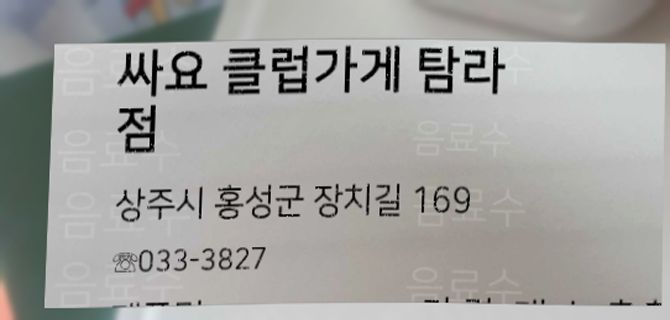

In [1]:
from selenium import webdriver
import time
browser = webdriver.Chrome('C:\\Users\\Administrator\\Desktop\\chromedriver.exe')

# 1. 네이버로 이동

browser.get('http://naver.com')

# 2. 로그인 버튼 클릭
elem = browser.find_element_by_class_name('link_login')
elem.click()

# 3. id,pw 입렵 
browser.find_element_by_id('id').send_keys('nav')
browser.find_element_by_id('pw').send_keys('naver.wd')

# 4. 로그인 버튼
browser.find_element_by_id('log.login').click()

time.sleep(3)


# 5. id 를 새로 입력 --> 에러난게 있음 
browser.find_element_by_id('id').clear() # 전에 입력했던 아이디 삭제 
browser.find_element_by_id('id').send_keys('miniskim12')

# 6. html 정보 출력 
print(browser.page_source)

# 7. 브라우저 종료 
# browser.close() 현재 탭만 종료
browser.quit() # 전체 브라우저 

### 네이버 항공권

In [12]:
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
browser = webdriver.Chrome('C:\\Users\\Administrator\\Desktop\\chromedriver.exe')
browser.maximize_window()# 창최대화

url = 'https://flight.naver.com/'
browser.get(url)

# 가는날 선택 - 글자를 가지고 
# browser.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[2]/button[1]').click()


# 이번달 27, 28 선택 
# browser.find_elements_by_link_text('27')[0].click()# --> 이번달 
# browser.find_elements_by_link_text('28')[0].click()

browser.find_element_by_class_name('Popular_search__3hRxB').click()

browser.find_element_by_xpath('//*[@id="buttonText_3"]').click()

try:
    elem= WebDriverWait(browser,3).until(EC.presence_of_element_located((By.XPATH,'//*[@id="__next"]/div/div/div/div[4]/div/div[2]/div[1]/button[1]')))
# 브라우저를 최대 3초 까지 대기하는데 이 XPATH가 나올 때 까지 --> 로딩이 좀 걸린다 했을 때 이것을 쓰면됨. 
    print(elem.text)
finally:
    browser.quit()

# elem = browser.find_element_by_xpath('//*[@id="__next"]/div/div/div/div[4]/div/div[2]/div[1]/button[1]')
# print(elem.text)

인천ICN방콕BKK
직항, 6시간
342,700원~


### 동적페이지에 대한 웹스크래핑 

+ 페이지가 접속될때 불러와지는게 아니고 사용자가 어떤 동작을 했을때 동작하는 
    - e.g. 스크롤을 내렸을 때 목록이 작성되는 
+ 할인하고 있는 영화 정보만 빼오기 

In [3]:
import requests
from bs4 import BeautifulSoup

url = 'https://play.google.com/store/movies/collection/cluster?clp=0g4XChUKD3RvcHNlbGxpbmdfcGFpZBAHGAQ%3D:S:ANO1ljJvXQM&gsr=ChrSDhcKFQoPdG9wc2VsbGluZ19wYWlkEAcYBA%3D%3D:S:ANO1ljK7jAA&hl=ko&gl=US'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36',
          'Accept-Language':'ko-KR,ko'} # 어떤 언어의 페이지를 가져오고 싶은지
    

res = requests.get(url,headers=headers)
res.raise_for_status()
soup = BeautifulSoup(res.text,'lxml')

movies = soup.find_all('div',attrs={'class':'ImZGtf mpg5gc'})
print(len(movies))

# with open('movie.html','w',encoding='utf8') as f:
#     f.write(soup.prettify())

for movie in movies:
    title = movie.find('div',attrs={'class':'WsMG1c nnK0zc'}).get_text()
    print(title)

50
Venom: Let There Be Carnage
007 노 타임 투 다이
Spider-Man: Far from Home
프리 가이
Spider-Man: Homecoming
The Amazing Spider-Man™
Illumination Presents: Dr. Seuss' The Grinch
The Amazing Spider-Man 2
듄
Resident Evil: Welcome to Raccoon City
프렌치 디스패치<
Dr. Seuss' How the Grinch Stole Christmas
Spider-Man: Into The Spider-Verse
Encanto
Spider-Man (2002)
Elf
F9: The Fast Saga
Antlers
Venom
The Hating Game
샹치와 텐 링즈의 전설
Sing
더 수어사이드 스쿼드
Spider-Man 3
National Lampoon's Christmas Vacation
Ice Age 5-Movie Collection
Love Actually
Spider-Man 2 (2004)
True to the Game 3
정글 크루즈
Clifford The Big Red Dog
Escape Room: Tournament of Champions
After We Fell
올드
Fortress (2021)
Polar Express
Spencer
Home Alone
Spider-Man 2 (Extended Edition)
The Hitman's Wife's Bodyguard
Halloween Kills Extended Cut
Die Hard
블랙 위도우
퍼피 구조대 더 무비
콰이어트 플레이스 2
Kingsman: The Secret Service
매트릭스
The Green Knight
Candyman (2021)
Home Alone 2: Lost in New York


### 동적 페이지 셀레니움으로 해보기 

In [3]:
import requests
from bs4 import BeautifulSoup

url = 'https://play.google.com/store/movies/collection/cluster?clp=0g4XChUKD3RvcHNlbGxpbmdfcGFpZBAHGAQ%3D:S:ANO1ljJvXQM&gsr=ChrSDhcKFQoPdG9wc2VsbGluZ19wYWlkEAcYBA%3D%3D:S:ANO1ljK7jAA&hl=ko&gl=US'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36',
          'Accept-Language':'ko-KR,ko'} # 어떤 언어의 페이지를 가져오고 싶은지
    

res = requests.get(url,headers=headers)
res.raise_for_status()
soup = BeautifulSoup(res.text,'lxml')

movies = soup.find_all('div',attrs={'class':'ImZGtf mpg5gc'})
print(len(movies))

# with open('movie.html','w',encoding='utf8') as f:
#     f.write(soup.prettify())

for movie in movies:
    title = movie.find('div',attrs={'class':'WsMG1c nnK0zc'}).get_text()
    print(title)

50
Venom: Let There Be Carnage
007 노 타임 투 다이
Spider-Man: Far from Home
프리 가이
Spider-Man: Homecoming
The Amazing Spider-Man™
Illumination Presents: Dr. Seuss' The Grinch
The Amazing Spider-Man 2
듄
Resident Evil: Welcome to Raccoon City
프렌치 디스패치<
Dr. Seuss' How the Grinch Stole Christmas
Spider-Man: Into The Spider-Verse
Encanto
Spider-Man (2002)
Elf
F9: The Fast Saga
Antlers
Venom
The Hating Game
샹치와 텐 링즈의 전설
Sing
더 수어사이드 스쿼드
Spider-Man 3
National Lampoon's Christmas Vacation
Ice Age 5-Movie Collection
Love Actually
Spider-Man 2 (2004)
True to the Game 3
정글 크루즈
Clifford The Big Red Dog
Escape Room: Tournament of Champions
After We Fell
올드
Fortress (2021)
Polar Express
Spencer
Home Alone
Spider-Man 2 (Extended Edition)
The Hitman's Wife's Bodyguard
Halloween Kills Extended Cut
Die Hard
블랙 위도우
퍼피 구조대 더 무비
콰이어트 플레이스 2
Kingsman: The Secret Service
매트릭스
The Green Knight
Candyman (2021)
Home Alone 2: Lost in New York


In [11]:
from selenium import webdriver
browser = webdriver.Chrome('C:\\Users\\Administrator\\Desktop\\chromedriver.exe')
browser.maximize_window()

# 페이지 이동 
url = 'https://play.google.com/store/movies/collection/cluster?clp=0g4XChUKD3RvcHNlbGxpbmdfcGFpZBAHGAQ%3D:S:ANO1ljJvXQM&gsr=ChrSDhcKFQoPdG9wc2VsbGluZ19wYWlkEAcYBA%3D%3D:S:ANO1ljK7jAA&hl=ko&gl=US'
browser.get(url)

# 스크롤 내리기
# 모니터 해상도 높이인 1080 위치로 스크롤 내리기
# browser.execute_script('window.scrollTo(0,1080)')# 1920 x 1080 
# browser.execute_script('window.scrollTo(0,2080)') 

# 지정한 위치로 스크롤 내리기 
# 화면 가장 아래로 스크롤 내리기 
# browser.execute_script('window.scrollTo(0,document.body.scrollHeight)')

import time 
interval = 2 # 2초에 한번씩 스크롤 내림 

# 현재 문서 높이를 가져와서 저장 
prev_height = browser.execute_script('return document.body.scrollHeight')

# 반복 수행:
# 스크롤을 가장 아래로 내임 
while True:
    browser.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    
    #페이지 로딩 대기
    time.sleep(interval)
    
    # 현재 문서 높이를 가져와서 저장 
    curr_height = browser.execute_script('return document.body.scrollHeight')
    if curr_height == prev_height:
        break
        
    prev_height = curr_height

print('스크롤 완료')
    
soup = BeautifulSoup(browser.page_source,'lxml')

movies = soup.find_all('div',attrs={'class':'Vpfmgd'})
# 클래스가 두개라면 [] 리스트로 묶어서 해도 됨 attrs={'class':['a','ImZGtf mpg5gc'}
print(len(movies))

# with open('movie.html','w',encoding='utf8') as f:
#     f.write(soup.prettify())

for movie in movies:
    title = movie.find('div',attrs={'class':'WsMG1c nnK0zc'}).get_text()
    
    # 할인 전 가격
    original_price = movie.find('span',attrs={'class':'SUZt4c djCuy'})
    if original_price:
        original_price = original_price.get_text()
    else:
#         print(title,'할인되지 않은 영화 제외')
        continue
        
    # 할인된 가격 
    price = movie.find('span',attrs={'class':'VfPpfd ZdBevf i5DZme'}).get_text()
    
    # 링크
    link = movie.find('a',attrs={'class':'JC71ub'})['href']
    # 올바른 링트 : https://play.google.com + link
    
    print(f'제목 : {title}')
    print(f'할인 전 금액 : {original_price}')
    print(f'할인 후 금액 : {price}')
    print('링크:',"https://play.google.com"+link)
    print('-'*50)
    
browser.quit()

스크롤 완료
200
제목 : 007 노 타임 투 다이
할인 전 금액 : US$19.99
할인 후 금액 : US$5.99
링크: https://play.google.com/store/movies/details/007_%EB%85%B8_%ED%83%80%EC%9E%84_%ED%88%AC_%EB%8B%A4%EC%9D%B4?id=80TMwW2WD3g.P
--------------------------------------------------
제목 : 더 수어사이드 스쿼드
할인 전 금액 : US$19.99
할인 후 금액 : US$9.99
링크: https://play.google.com/store/movies/details/%EB%8D%94_%EC%88%98%EC%96%B4%EC%82%AC%EC%9D%B4%EB%93%9C_%EC%8A%A4%EC%BF%BC%EB%93%9C?id=0NAuZAJYPKY.P
--------------------------------------------------
제목 : Escape Room: Tournament of Champions
할인 전 금액 : US$5.99
할인 후 금액 : US$0.99
링크: https://play.google.com/store/movies/details/Escape_Room_Tournament_of_Champions?id=5ZihwGde8_g.P
--------------------------------------------------
제목 : Spencer
할인 전 금액 : US$19.99
할인 후 금액 : US$3.99
링크: https://play.google.com/store/movies/details/Spencer?id=Syv-16fUi2A.P
--------------------------------------------------
제목 : The Hitman's Wife's Bodyguard
할인 전 금액 : US$19.99
할인 후 금액 : US$10.99
링크: https://play.goo

### headless 크롬
- 크롬이 없는 크롬 
- 백그라운드에서 동작하는 크롬 

In [13]:
from selenium import webdriver

#내부적으로 크롬을 띠우는
options= webdriver.ChromeOptions()
options.headless=True
options.add_argument('window-size=1920x1080')

browser = webdriver.Chrome('C:\\Users\\Administrator\\Desktop\\chromedriver.exe',options=options)
browser.maximize_window()



# 페이지 이동 
url = 'https://play.google.com/store/movies/collection/cluster?clp=0g4XChUKD3RvcHNlbGxpbmdfcGFpZBAHGAQ%3D:S:ANO1ljJvXQM&gsr=ChrSDhcKFQoPdG9wc2VsbGluZ19wYWlkEAcYBA%3D%3D:S:ANO1ljK7jAA&hl=ko&gl=US'
browser.get(url)

import time 
interval = 2 # 2초에 한번씩 스크롤 내림 

# 현재 문서 높이를 가져와서 저장 
prev_height = browser.execute_script('return document.body.scrollHeight')

# 반복 수행:
# 스크롤을 가장 아래로 내임 
while True:
    browser.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    
    #페이지 로딩 대기
    time.sleep(interval)
    
    # 현재 문서 높이를 가져와서 저장 
    curr_height = browser.execute_script('return document.body.scrollHeight')
    if curr_height == prev_height:
        break
        
    prev_height = curr_height

print('스크롤 완료')
    
    
#페이지가 어떻게 돌아가는지 스크린샷 찍기
browser.get_screenshot_as_file('google_movie.png')


soup = BeautifulSoup(browser.page_source,'lxml')

movies = soup.find_all('div',attrs={'class':'Vpfmgd'})
# 클래스가 두개라면 [] 리스트로 묶어서 해도 됨 attrs={'class':['a','ImZGtf mpg5gc'}
print(len(movies))

# with open('movie.html','w',encoding='utf8') as f:
#     f.write(soup.prettify())

for movie in movies:
    title = movie.find('div',attrs={'class':'WsMG1c nnK0zc'}).get_text()
    
    # 할인 전 가격
    original_price = movie.find('span',attrs={'class':'SUZt4c djCuy'})
    if original_price:
        original_price = original_price.get_text()
    else:
#         print(title,'할인되지 않은 영화 제외')
        continue
        
    # 할인된 가격 
    price = movie.find('span',attrs={'class':'VfPpfd ZdBevf i5DZme'}).get_text()
    
    # 링크
    link = movie.find('a',attrs={'class':'JC71ub'})['href']
    # 올바른 링트 : https://play.google.com + link
    
    print(f'제목 : {title}')
    print(f'할인 전 금액 : {original_price}')
    print(f'할인 후 금액 : {price}')
    print('링크:',"https://play.google.com"+link)
    print('-'*50)
    
browser.quit()

스크롤 완료
200
제목 : 007 노 타임 투 다이
할인 전 금액 : US$19.99
할인 후 금액 : US$5.99
링크: https://play.google.com/store/movies/details/007_%EB%85%B8_%ED%83%80%EC%9E%84_%ED%88%AC_%EB%8B%A4%EC%9D%B4?id=80TMwW2WD3g.P
--------------------------------------------------
제목 : 더 수어사이드 스쿼드
할인 전 금액 : US$19.99
할인 후 금액 : US$9.99
링크: https://play.google.com/store/movies/details/%EB%8D%94_%EC%88%98%EC%96%B4%EC%82%AC%EC%9D%B4%EB%93%9C_%EC%8A%A4%EC%BF%BC%EB%93%9C?id=0NAuZAJYPKY.P
--------------------------------------------------
제목 : Escape Room: Tournament of Champions
할인 전 금액 : US$5.99
할인 후 금액 : US$0.99
링크: https://play.google.com/store/movies/details/Escape_Room_Tournament_of_Champions?id=5ZihwGde8_g.P
--------------------------------------------------
제목 : Spencer
할인 전 금액 : US$19.99
할인 후 금액 : US$3.99
링크: https://play.google.com/store/movies/details/Spencer?id=Syv-16fUi2A.P
--------------------------------------------------
제목 : The Hitman's Wife's Bodyguard
할인 전 금액 : US$19.99
할인 후 금액 : US$10.99
링크: https://play.goo

#### 1). 주의점 
- user agent를 바꿔줄 필요가 있음 

In [15]:
from selenium import webdriver

#내부적으로 크롬을 띠우는
options= webdriver.ChromeOptions()
options.headless=True
options.add_argument('window-size=1920x1080')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36')
browser = webdriver.Chrome('C:\\Users\\Administrator\\Desktop\\chromedriver.exe',options=options)
browser.maximize_window()

# user agent 를 가져올때 따로 지정을 안해주면 그 값이 날아감 따로 지정을 해줘야 함.
url='https://www.whatismybrowser.com/detect/what-is-my-user-agent'
browser.get(url)

detected_value = browser.find_element_by_id('detected_value')
print(detected_value.text)
browser.quit()


Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36
